In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated [list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv  
load_dotenv()

True

In [4]:
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.1-8b-instant")

In [6]:
response=llm.invoke("Hi this is Mallikarjun Sonna Agentic AI Engineer")
response.content

"Nice to meet you, Mallikarjun Sonna. You're an AI Engineer by profession. That's exciting. What specific area of AI are you working on, or what kind of projects have you been involved in recently? I'm here to help with any questions or topics you'd like to discuss."

In [7]:
from langchain_openai import ChatOpenAI
llm1=ChatOpenAI(model="gpt-4o")

In [8]:
response=llm1.invoke("hey This is Mallikarjun Sonna an AI Engineer??")
response.content

"Hello Mallikarjun! It's great to meet you. How can I assist you today?"

### Lets Create The Node & Edges

In [9]:
def megabot(state:State):
    return{"messages":llm.invoke(state["messages"])}

In [10]:
graph=StateGraph(State)

# lets add nodes & edges
graph.add_node("megabot",megabot)

#lets add edges
graph.add_edge(START,"megabot")
graph.add_edge("megabot",END)

build_graph=graph.compile()

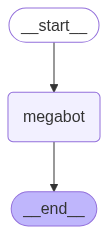

In [11]:
#lets Display the graph
display(Image(build_graph.get_graph().draw_mermaid_png()))